## Aprašomoji statistika


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Sintetinių pardavimų duomenų generavimas aprašomajai statistikai

Šis kodas sukuria dirbtinį pardavimų duomenų rinkinį analizei. Naudojamas fiksuotas seed, kad rezultatai būtų pakartojami. Pardavimai generuojami pagal normalųjį skirstinį (vidurkis ~5000, nuokrypis ~1200), klientų amžius – sveikųjų skaičių intervale 18–69, parduotuvės reitingas – tolygiai nuo 1 iki 5. Produktų kategorijos parenkamos atsitiktinai pagal nurodytas tikimybes. Duomenys skirti vidurkių, medianų, nuokrypio, kvantilių ir kategorijų pasiskirstymo demonstravimui.

In [11]:
#Sugeneruojame pardavimų duomenis
np.random.seed(42)
data = pd.DataFrame({
    "Pardavimai": np.random.normal(loc=5000, scale=1200, size=1000).round(2),  
    "Klientų_amžius": np.random.randint(18, 70, size=1000),  
    "Parduotuvės_reitingas": np.random.uniform(1, 5, size=1000),  
    "Produktų_kategorija": np.random.choice(["Elektronika", "Drabužiai", "Bakalėja", "Baldai"], size=1000, p=[0.4, 0.3, 0.2, 0.1]),
})

In [12]:
data.dtypes

Pardavimai               float64
Klientų_amžius             int32
Parduotuvės_reitingas    float64
Produktų_kategorija       object
dtype: object

### Naudojamos funkcijos

np.random.seed() – užtikrina atsitiktinių skaičių generavimo atkartojamumą.

np.random.normal() – generuoja skaitinius duomenis pagal normalųjį skirstinį.

np.random.randint() – generuoja sveikųjų skaičių reikšmes nurodytame intervale.

np.random.uniform() – generuoja tolygiai pasiskirsčiusias reikšmes intervale.

np.random.choice() – generuoja kategorines reikšmes pagal nurodytas tikimybes.

pd.DataFrame() – sujungia sugeneruotus kintamuosius į struktūruotą lentelę, tinkamą aprašomajai statistikai.

#round pardavimai

In [13]:
data.head().round(2)

,Pardavimai,Klientų_amžius,Parduotuvės_reitingas,Produktų_kategorija
0,5596.06,61,3.22,Elektronika
1,4834.08,66,1.02,Bakalėja
2,5777.23,57,4.04,Elektronika
3,6827.64,28,1.14,Drabužiai
4,4719.02,20,3.98,Drabužiai


In [14]:
data.describe() #.round(2)

,Pardavimai,Klientų_amžius,Parduotuvės_reitingas
count,1000.000000,1000.000000,1000.000000
mean,5023.198480,43.080000,2.988864
std,1175.059021,15.047526,1.157172
min,1110.480000,18.000000,1.000539
25%,4222.890000,30.000000,2.039257
50%,5030.360000,42.000000,2.976053
75%,5777.535000,56.000000,4.014246
max,9623.280000,69.000000,4.993390


## Centrinės tendencijos rodikliai

mean() – apskaičiuoja vidurkį, parodantį bendrą pardavimų lygį.

median() – apskaičiuoja medianą, t. y. reikšmę, kuri padalija duomenis į dvi lygias dalis.

mode() – grąžina dažniausiai pasikartojančią reikšmę; pasirenkama pirmoji reikšmė, jei modų yra daugiau nei viena.

In [15]:
vidurkis = data["Pardavimai"].mean()
mediana = data["Pardavimai"].median()
moda = data["Pardavimai"].mode()[0]

print(f"Pardavimų vidurkis: {vidurkis:.2f}")
print(f"Pardavimų mediana: {mediana:.2f}")
print(f"Pardavimų moda: {moda:.2f}")

Pardavimų vidurkis: 5023.20
Pardavimų mediana: 5030.36
Pardavimų moda: 4734.84


moda - daug pasikartojančių mažų reikšmių - todėl tokia maža - atsitiktinai sugeneruota. 
reikia "Pardavimai": np.random.normal(loc=5000, scale=1200, size=1000).round(2)

## Sklaidos (variability) rodiklių skaičiavimas

std() – apskaičiuoja standartinį nuokrypį, parodantį, kiek vidutiniškai pardavimai nutolę nuo vidurkio.

var() – apskaičiuoja dispersiją, kuri yra standartinio nuokrypio kvadratas.

max() - min() – apskaičiuoja reikšmių intervalą (range), t. y. skirtumą tarp didžiausios ir mažiausios pardavimų reikšmės.

np.percentile() – apskaičiuoja procentiles; šiuo atveju naudojamas interkvartilinis plotis (IQR), kuris parodo skirtumą tarp 75-ojo ir 25-ojo procentilių ir yra mažiau jautrus išskirtinėms reikšmėms.##

In [16]:
std = data["Pardavimai"].std()
variance = data["Pardavimai"].var()
range = data["Pardavimai"].max() - data["Pardavimai"].min()
iqr = np.percentile(data["Pardavimai"], 75) - np.percentile(data["Pardavimai"], 25)

print(f"Standartinis nuokrypis: {std:.2f}")
print(f"Variacija: {variance:.2f}")
print(f"Diapazonas: {range:.2f}")
print(f"Interkvartilinis diapazonas (IQR): {iqr:.2f}")

Standartinis nuokrypis: 1175.06
Variacija: 1380763.70
Diapazonas: 8512.80
Interkvartilinis diapazonas (IQR): 1554.65


In [17]:
print(f"Pardavimų vidurkis: {vidurkis:.2f}")
print(f"Pardavimų mediana: {mediana:.2f}")
print(f"Pardavimų moda: {moda:.2f}")

Pardavimų vidurkis: 5023.20
Pardavimų mediana: 5030.36
Pardavimų moda: 4734.84


## Pardavimų pasiskirstymo vizualizavimas (histplot)

**Histograma** leidžia tiesiogiai matyti skaitinių duomenų pasiskirstymo formą.

**Statistinė nauda:** padeda įvertinti simetriją, pasvirimą, pikus ir galimus išskirtinius dydžius.

bins=30 - suskaido duomenis į pakankamai smulkius intervalus, kad pasiskirstymas būtų aiškus.

kde=True - prideda tankio kreivę, kuri palengvina pasiskirstymo formos interpretaciją.

**Naudojimo atvejis** - tinkamiausias grafikas centrinei tendencijai ir sklaidos rodikliams interpretuoti.

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


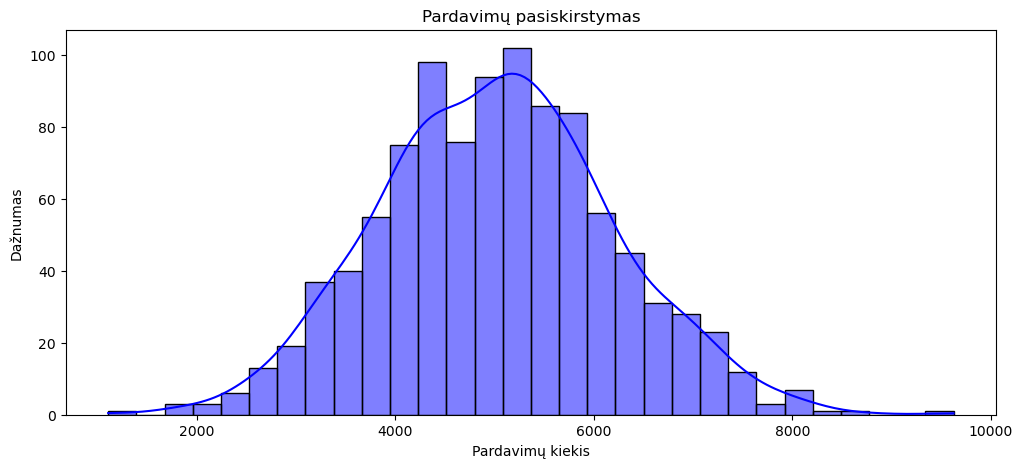

In [23]:
plt.figure(figsize=(12, 5))
sns.histplot(data["Pardavimai"], kde=True, bins=30, color="blue")
plt.title("Pardavimų pasiskirstymas")
plt.xlabel("Pardavimų kiekis")
plt.ylabel("Dažnumas")
plt.show()

**Pardavimų pasiskirstymo vizualizavimas (`boxplot`)**

- **Kodėl boxplot** – leidžia greitai apibendrinti duomenų pasiskirstymą viename vaizde.  
- **Statistinė nauda** – aiškiai parodo medianą, kvartilius ir interkvartilinį plotį (IQR).  
- **Išskirtinės reikšmės** – vizualiai identifikuoja galimus outlierius.  
- **Kompaktiškumas** – ypač tinkamas lyginimui tarp grupių arba greitam duomenų patikrinimui.  
- **Naudojimo atvejis** – efektyvus vertinant sklaidą ir duomenų stabilumą, kai nereikia visos pasiskirstymo formos.


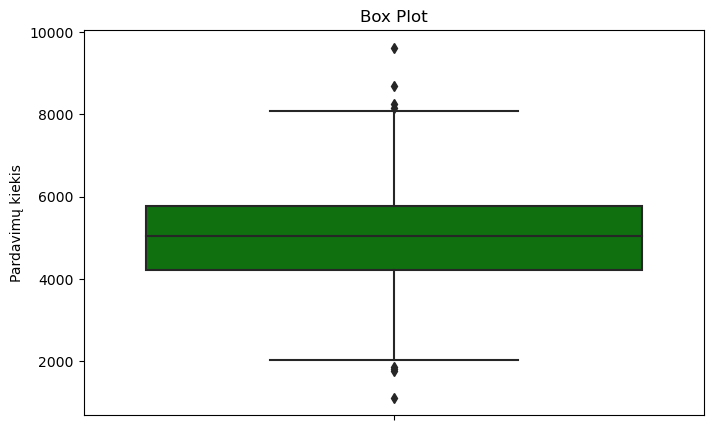

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=data["Pardavimai"], color="green")
plt.title("Box Plot")
plt.ylabel("Pardavimų kiekis")
plt.show()

**Produktų kategorijų pasiskirstymo vizualizavimas (`countplot`)**

- **Kodėl countplot** – skirtas kategorinių duomenų dažniams skaičiuoti ir vizualizuoti.  
- **Statistinė nauda** – aiškiai parodo, kiek stebėjimų tenka kiekvienai kategorijai.  
- **Stulpelių etiketės** – `bar_label` leidžia tiesiogiai matyti tikslius kiekius be papildomo skaičiavimo.  
- **Interpretacija** – padeda greitai įvertinti disproporcijas tarp kategorijų.  
- **Naudojimo atvejis** – tinkamiausias grafikas kategorinių kintamųjų pasiskirstymui aprašomojoje statistikoje.


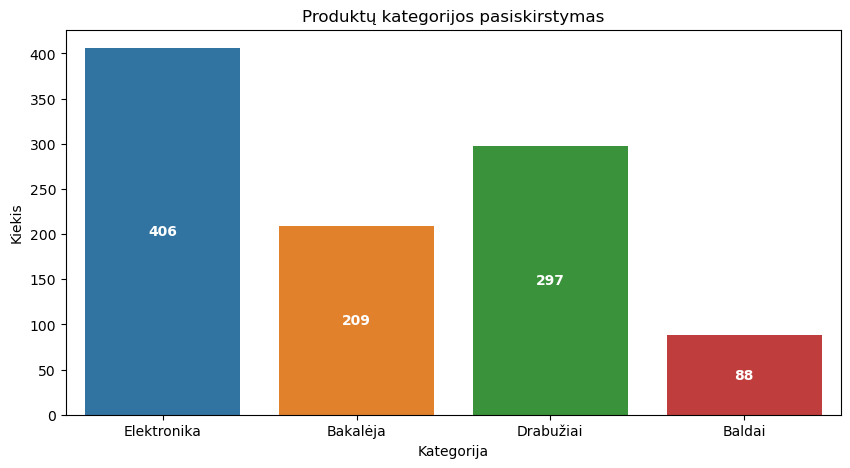

In [24]:
plt.figure(figsize=(10, 5))
ax=sns.countplot(x=data["Produktų_kategorija"])
ax.bar_label(ax.containers[0], fmt='%d', label_type='center', fontsize=10, color='white', fontweight='bold')
plt.title("Produktų kategorijos pasiskirstymas")
plt.xlabel("Kategorija")
plt.ylabel("Kiekis")
plt.show()


**Vidutinių pardavimų analizė pagal produktų kategoriją (`groupby` + `barplot`)**

- **`groupby()` + `mean()`** – agreguoja pardavimus pagal produktų kategoriją ir apskaičiuoja vidurkį kiekvienai grupei.  
- **Kodėl barplot** – tinkamiausias grafikas palyginti agreguotas reikšmes tarp kategorijų.  
- **Statistinė nauda** – leidžia įvertinti skirtumus tarp kategorijų, remiantis centrine tendencija (vidurkiu).  
- **Stulpelių etiketės** – `bar_label` pateikia tikslias vidutinių pardavimų reikšmes tiesiogiai grafike.  
- **Naudojimo atvejis** – dažnas sprendimas analizuojant, kurios produktų kategorijos generuoja didesnius vidutinius pardavimus.



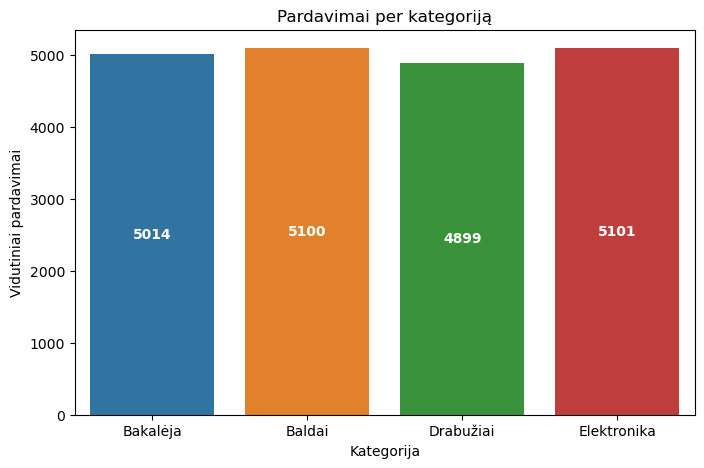

In [25]:
#Skaičiuojame vidutinius pardavimus per produktų kategoriją
sales = data.groupby("Produktų_kategorija")["Pardavimai"].mean()

plt.figure(figsize=(8, 5))
ax=sns.barplot(x=sales.index, y=sales.values)
ax.bar_label(ax.containers[0], fmt='%d', label_type='center', fontsize=10, color='white', fontweight='bold')
plt.title("Pardavimai per kategoriją")
plt.xlabel("Kategorija")
plt.ylabel("Vidutiniai pardavimai")
plt.show()

**Vidutiniai ir medianiniai pardavimai pagal produktų kategoriją**

- **`groupby()` + `mean()`** – apskaičiuoja vidutinius pardavimus kiekvienai produktų kategorijai.  
- **`groupby()` + `median()`** – apskaičiuoja medianinius pardavimus, kurie yra atsparesni išskirtinėms reikšmėms.  
- **Vidurkis (mean)** – jautrus labai didelėms arba labai mažoms reikšmėms (outlieriams).  
- **Mediana (median)** – parodo „tipinę“ reikšmę ir dažnai geriau atspindi realią situaciją, kai duomenys nėra simetriški.  
- **Analitinė praktika** – vidurkį ir medianą verta lyginti tarpusavyje, kad būtų galima įvertinti, ar rezultatus stipriai veikia kraštinės reikšmės.



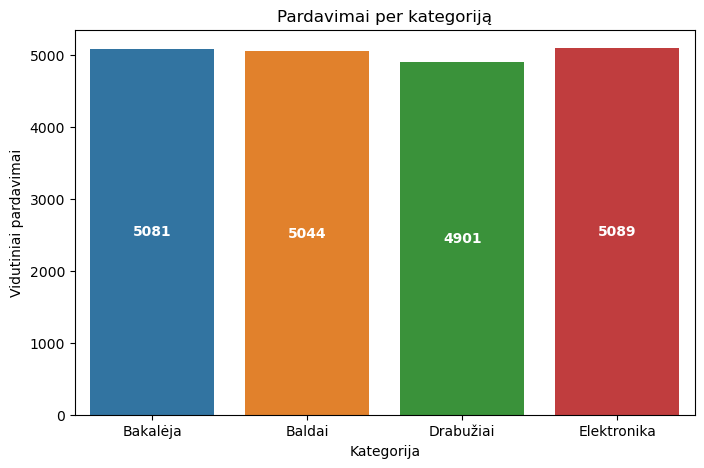

In [20]:
#Skaičiuojame vidutinius pardavimus per produktų kategoriją
sales = data.groupby("Produktų_kategorija")["Pardavimai"].median()

plt.figure(figsize=(8, 5))
ax=sns.barplot(x=sales.index, y=sales.values)
ax.bar_label(ax.containers[0], fmt='%d', label_type='center', fontsize=10, color='white', fontweight='bold')
plt.title("Pardavimai per kategoriją")
plt.xlabel("Kategorija")
plt.ylabel("Vidutiniai pardavimai")
plt.show()

**Nuokrypių (outliers) identifikavimas naudojant IQR metodą**

- **Skaitinių stulpelių atranka** – analizuojami tik skaitiniai kintamieji (`select_dtypes(include=np.number)`), nes nuokrypiai apibrėžiami skaitinėms reikšmėms.  
- **Kvartiliai (Q1 ir Q3)** – apskaičiuojamas 25-asis ir 75-asis procentiliai, apibrėžiantys pagrindinę duomenų masę.  
- **IQR (Interkvartilinis plotis)** – skaičiuojamas kaip `Q3 - Q1`, padaugintas iš 1.5 pagal standartinę statistinę praktiką.  
- **Nuokrypių taisyklė** – reikšmės laikomos nuokrypiais, jei jos mažesnės nei `Q1 − 1.5·IQR` arba didesnės nei `Q3 + 1.5·IQR`.  
- **Rezultatų interpretacija** – kiekvienam kintamajam atspausdinamas nuokrypių skaičius ir pačios reikšmės, jei jos egzistuoja.  
- **Analitinė praktika** – nuokrypiai nebūtinai yra klaidos, tačiau jie gali stipriai paveikti vidurkį, dispersiją ir statistines išvadas.



In [21]:
#Kodas patikrint nuokrypiams(outliers)

outliers_dict = {}

numeric = data.select_dtypes(include=np.number).columns

for col in numeric:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = (Q3 - Q1) * 1.5

    outliers = data[col][
        (data[col] < Q1 - IQR) | (data[col] > Q3 + IQR)
    ]
    if len(outliers) > 0:
        print(
            f"{col} turi {len(outliers)} nuokryp{'ius' if len(outliers) != 1 else 'į'}:"
        )
        for i, value in enumerate(outliers):
            if i == len(outliers) - 1:
                print(value, end="\n\n")
            else:
                print(value)
        outliers_dict[col] = outliers
    else:
        print(f"{col} neturi nuokrypių", end=".\n\n")

Pardavimai turi 8 nuokrypius:
1856.31
8264.2
9623.28
1110.48
8694.66
1763.74
1818.84
8158.86

Klientų_amžius neturi nuokrypių.

Parduotuvės_reitingas neturi nuokrypių.



**Kaip elgtis su nuokrypiais (outliers)**

- **Pašalinimas** – taikomas tada, kai nuokrypiai yra aiškios duomenų klaidos (pvz., įvedimo, matavimo, techninės).  
- **Apribojimas (capping / winsorizing)** – kraštinės reikšmės pakeičiamos riba (pvz., Q1 − 1.5·IQR arba Q3 + 1.5·IQR), išlaikant įrašų skaičių.  
- **Transformacijos** – taikomas logaritmavimas ar kitos transformacijos, kai nuokrypiai yra realūs, bet labai asimetriški.  
- **Atsparūs rodikliai** – vietoje vidurkio naudojama mediana, IQR ar kvantiliai.  
- **Palikimas** – nuokrypiai paliekami, jei jie turi verslo prasmę (pvz., labai didelis užsakymas ar išskirtinis klientas).

**Geroji praktika**  
Nuokrypių šalinimas visada turi būti pagrįstas duomenų prasme ir analizės tikslu, o ne atliekamas automatiškai.


**Python funkcijos nuokrypių (outliers) tvarkymui**

- **`quantile()`** – naudojama riboms apskaičiuoti (Q1, Q3) pagal IQR metodą.  
- **Boolean filtravimas (`<`, `>`, `&`, `|`)** – leidžia pašalinti įrašus už nustatytų ribų.  
- **`where()`** – pakeičia nuokrypių reikšmes į `NaN` arba kitą reikšmę, išlaikant duomenų struktūrą.  
- **`clip()`** – apriboja reikšmes iki nustatytų ribų (winsorizing metodas).  
- **`dropna()`** – pašalina įrašus, kuriuose nuokrypiai buvo pažymėti kaip `NaN`.  
- **`np.log()` / `np.log1p()`** – taikomos transformacijos, mažinančios kraštinių reikšmių įtaką.  
- **`median()` / `mean()`** – naudojamos palyginti rezultatams prieš ir po nuokrypių tvarkymo.

**Geroji praktika**  
Prieš pasirenkant funkciją, svarbu nuspręsti, ar nuokrypiai yra klaidos, ar versliškai prasmingos reikšmės.
